# CS7324 - Lab 1:
### Isabela Salomon, Zach Bohl, Luigi Allen
Intel Image Classification: https://www.kaggle.com/datasets/puneet6060/intel-image-classification

# 1 - Business Understanding


### Business Understanding

The dataset consists of around 25,000 images of natural scenes from various locations around the world. These images are categorized into six distinct categories: buildings, forest, glacier, mountain, sea, and street. The primary purpose of this dataset is to facilitate image classification tasks, specifically for the development of machine learning models capable of identifying and categorizing natural scenes based on visual features.

### Additional Business Understanding (J)

A specialized travel community website could use this image dataset to create a dynamic and personalized platform that improves user experience by automatically sharing and discovering travel experiences. Using this dataset to train a landscape classification models, the developers can create an AI system that automatically categorizes user uploaded photos of landscapes and destinations. This allows members to automatically organize and explore image libraries based off their classification. This could allow the platform to offer personalized travel recommendations based on users' activity within a given category. For example, if a member frequently uploads or interacts with images of mountains or forests, the system can suggest comparable nature-focused destinations or travel itineraries shared by other community members. Similarly, if a user consistently uploads a specific landscape, it could recommend new destinations to build diversity in user interest.

Additionally, this image classification system powers could grow platform experience, such as Discover Similar Destinations, encouraging users to stay longer on the site, leading to increased ad revenue. The image classification can play a role in an intelligent content organization system, with professional photos and travel stories being automatically tagged and categorized. This would make it easier for users to find relevant content and inspiration. As part of an integrated broader machine learning pipeline, the image classification can help find trends in the types of images with the most engagement, as well as part of a recommendation engine for vacations and experiences that resonate with the user and/or community interests. Although it may not account for an entire pipeline, the image classification system could help enhance user interaction and drive site growth, ultimately leading to larger revenues.

More importantly, this image classification system could be the building block for more advanced features. As the building block, it could lead to a development of a hierarchical classification system that can identify not just broad landscape types, but specific landmarks or destinations. For example, the system could evolve from identifying a photo as "mountains" to recognizing it as the Rockies. As the system acquires more images from users, it could incorporate re-training algorithms to periodically improve its accuracy and expand its classification capabilities.



#### Purpose and Data Collection
The dataset was originally collected and provided by Intel for a public image classification challenge on DataHack, aiming to encourage research and development in image recognition. It is designed for the training and evaluation of machine learning algorithms in a well-defined classification task. 

#### Prediction Task and Stakeholders
The prediction task involves correctly classifying images into one of the six categories based on their visual content. Third parties that might be interested in the results of this task include:

1. **Tech companies** working on image recognition software, especially those developing autonomous systems or mobile applications that rely on scene understanding.
2. **Tourism and mapping companies** (e.g., Google Maps or National Geographic), which could use the results to automatically categorize and organize large volumes of location-based imagery.
3. **Environmental researchers and agencies**, who may use the model to analyze landscape images for environmental monitoring and land classification.
4. **Real estate and urban planning firms**, for understanding and analyzing trends in urban and rural scenes.

#### Importance of the Data
This data is important because scene recognition is crucial in many industries, from self-driving car navigation to environmental conservation. Automated classification of landscapes can speed up processes that would otherwise require manual tagging, allowing industries to process and make decisions from visual data more efficiently. The accuracy of the classification directly impacts the usability of the model for these applications.

#### Model Performance Expectations
To be useful for stakeholders, the model would need to perform with high accuracy—preferably over 90%. However, the performance threshold may vary depending on the use case. For autonomous systems, higher precision would be required to avoid errors in navigation or environmental monitoring. For general applications, slightly lower accuracy might be acceptable if it still reduces the time and cost of manual image classification.


# DELETE HERE
About Dataset
Context
This is image data of Natural Scenes around the world.

Content
This Data contains around 25k images of size 150x150 distributed under 6 categories.
{'buildings' -> 0,
'forest' -> 1,
'glacier' -> 2,
'mountain' -> 3,
'sea' -> 4,
'street' -> 5 }

The Train, Test and Prediction data is separated in each zip files. There are around 14k images in Train, 3k in Test and 7k in Prediction.
This data was initially published on https://datahack.analyticsvidhya.com by Intel to host a Image classification Challenge.

Acknowledgements
Thanks to https://datahack.analyticsvidhya.com for the challenge and Intel for the Data

Photo by Jan Böttinger on Unsplash

Inspiration
Want to build powerful Neural network that can classify these images with more accuracy.

# 2 - Data Preparation

In [2]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt


In [3]:
# Define the paths to training and testing data
train_dir = 'archive/seg_train/seg_train'  # Replace with your path
test_dir = 'archive/seg_test/seg_test'

# Categories present in the dataset
categories = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
 
# Display directory structure and image counts
print("Training Data Overview:")
for category in categories:
    path = os.path.join(train_dir, category)
    print(f"Category: {category}, Number of images: {len(os.listdir(path))}")
 
print("\nTesting Data Overview:")
test_images = os.listdir(test_dir)
print(f"Total number of test categories: {len(test_images)}")

Training Data Overview:
Category: buildings, Number of images: 2191
Category: forest, Number of images: 2271
Category: glacier, Number of images: 2404
Category: mountain, Number of images: 2512
Category: sea, Number of images: 2274
Category: street, Number of images: 2382

Testing Data Overview:
Total number of test categories: 6


### [.5 points] Read in your images as numpy arrays. Resize and recolor images as necessary. 

In [4]:
# Set the path to the dataset directory (modify this path as needed)
data_dir = 'archive/seg_train/seg_train'  # Replace with the correct path
 
# List all categories (subfolders) in the dataset
categories = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
 
# Initialize empty lists to store images and labels
images = []
labels = []
 
# Loop through each category and read images
for category in categories:
    category_path = os.path.join(data_dir, category)
   
    # Get the numeric label for each category
    label = categories.index(category)
   
    # Loop through each image in the category
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
       
        # Open the image, convert it to RGB, resize it, and convert to a NumPy array
        try:
            img = Image.open(img_path).convert('RGB').resize((50, 50))
            img_array = np.array(img)
           
            # Append the image array and its label to the lists
            images.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
 
# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
 
print(f"Loaded {images.shape[0]} images with shape: {images.shape}")

# Print an eample of image in a 3-D format 
images[1]

Loaded 14034 images with shape: (14034, 50, 50, 3)


array([[[ 73, 122, 183],
        [ 73, 120, 180],
        [ 72, 121, 181],
        ...,
        [237, 237, 243],
        [234, 234, 242],
        [229, 231, 238]],

       [[ 81, 125, 185],
        [ 80, 124, 183],
        [ 76, 123, 183],
        ...,
        [238, 239, 244],
        [240, 241, 245],
        [237, 238, 242]],

       [[ 89, 133, 188],
        [ 93, 134, 186],
        [ 95, 135, 188],
        ...,
        [233, 234, 239],
        [235, 235, 242],
        [232, 232, 239]],

       ...,

       [[ 99,  92,  76],
        [ 73,  72,  50],
        [ 43,  44,  24],
        ...,
        [ 63,  51,  43],
        [ 47,  35,  32],
        [ 57,  45,  42]],

       [[ 46,  48,  27],
        [ 53,  55,  35],
        [ 42,  41,  27],
        ...,
        [ 73,  59,  43],
        [ 83,  68,  55],
        [ 83,  67,  57]],

       [[ 35,  37,  19],
        [ 39,  43,  22],
        [ 49,  49,  33],
        ...,
        [ 32,  17,  10],
        [ 47,  34,  21],
        [ 64,  49,  34]]

### [.4 points] Linearize the images to create a table of 1-D image features (each row should be one image).   

In [5]:
# Define the number of images to print
num_images_to_print = 10

# Loop through the images and print the flattened version
for i, img in enumerate(images[:num_images_to_print]):
    print(f"Flattened image {i+1}:")
    print(img.flatten())

Flattened image 1:
[247 247 245 ...  49  44  41]
Flattened image 2:
[ 73 122 183 ...  64  49  34]
Flattened image 3:
[131 194 245 ... 130 154  54]
Flattened image 4:
[193 167 191 ... 242 223 239]
Flattened image 5:
[  1  33  62 ... 219 221 206]
Flattened image 6:
[240 236 223 ...   9  11  23]
Flattened image 7:
[ 99 132 186 ... 149 144 140]
Flattened image 8:
[137 198 226 ...  60  81  88]
Flattened image 9:
[248 249 250 ...  87 103  88]
Flattened image 10:
[161 194 222 ... 142 120  89]


### [.1 points] Visualize several images.

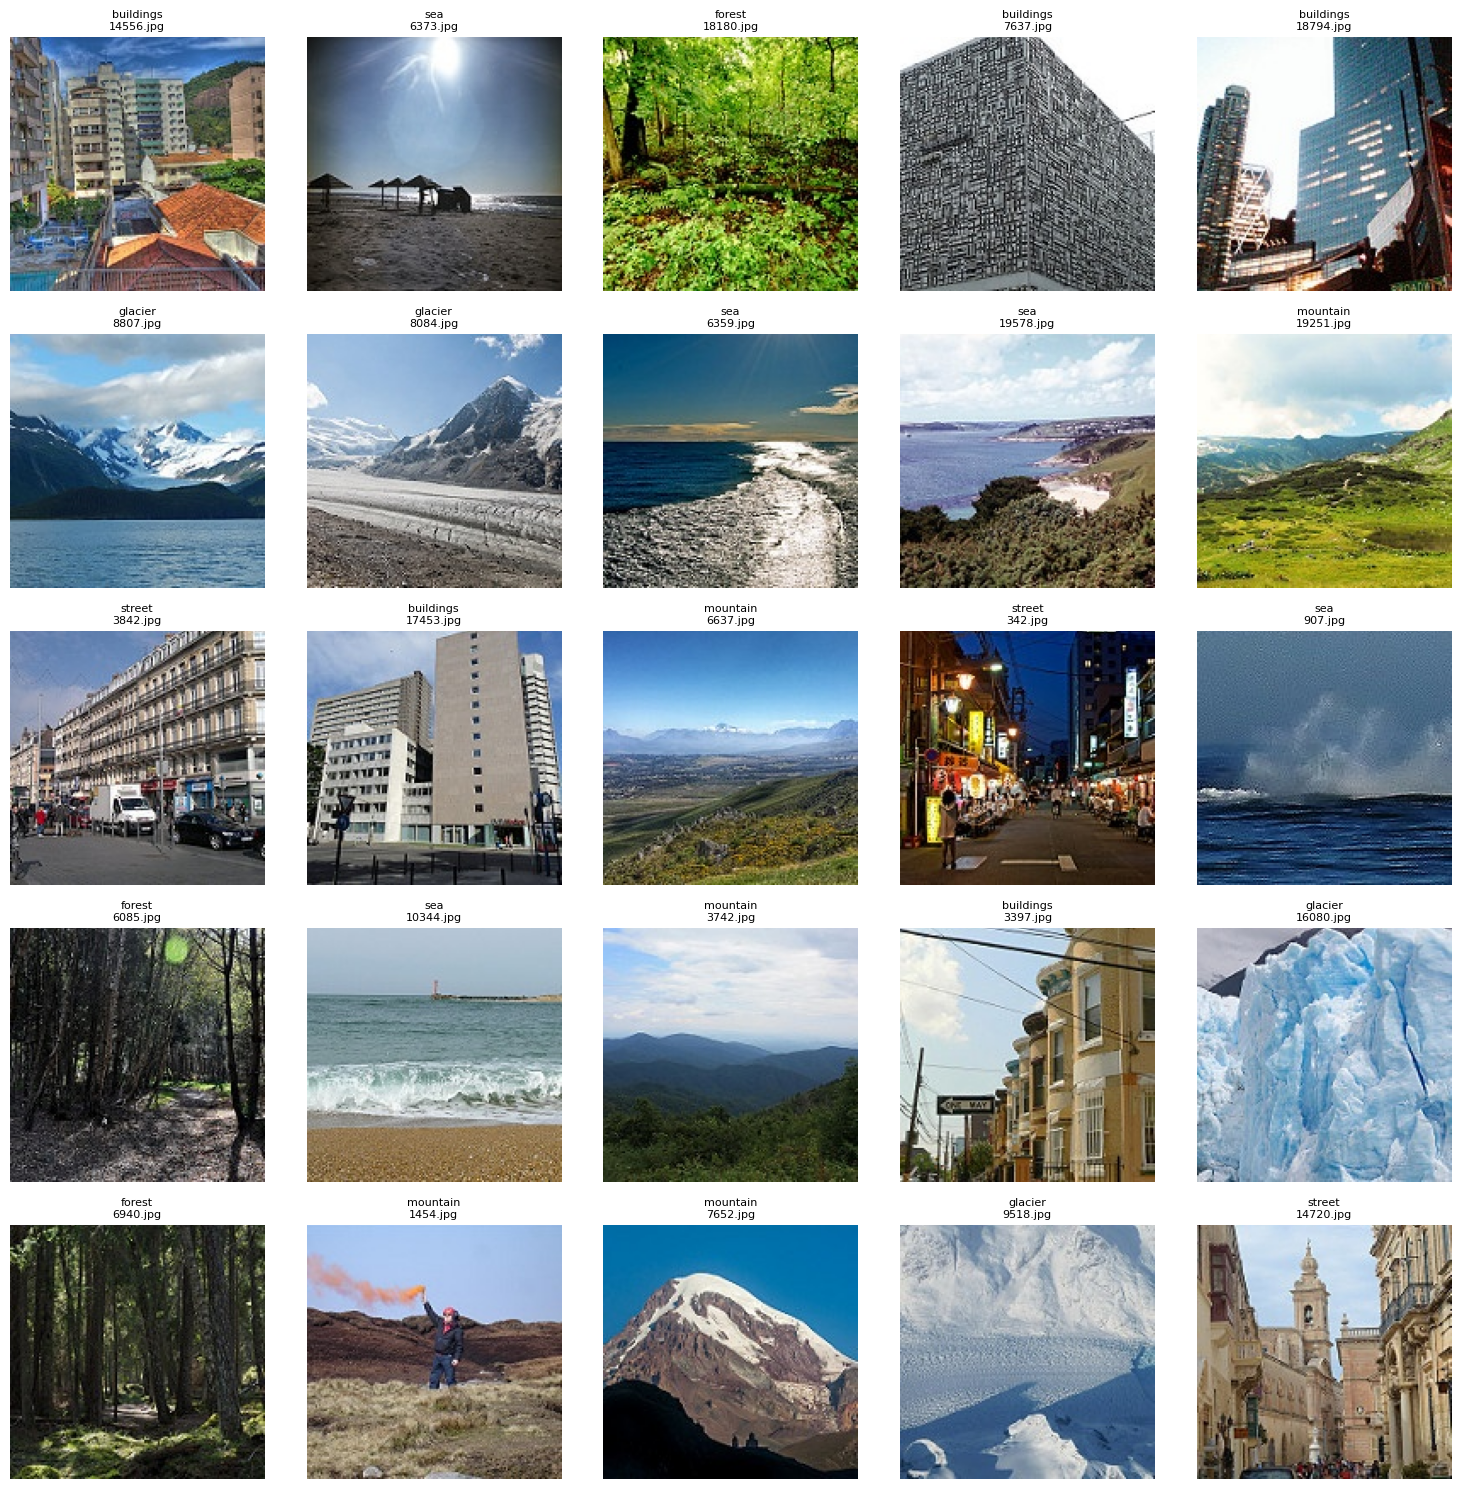

In [6]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import mplcursors

# Define the paths to training data
train_dir = 'archive/seg_train/seg_train'  # Replace with your path

# Categories present in the dataset
categories = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# Function to load images and their metadata from each category
def load_images_from_category(category, num_images):
    path = os.path.join(train_dir, category)
    images = os.listdir(path)
    selected_images = random.sample(images, num_images)
    return [(Image.open(os.path.join(path, img)), category, img) for img in selected_images]

# Function to display images with tooltips
def display_images_with_tooltips(images):
    fig, axes = plt.subplots(5, 5, figsize=(15, 15))
    axes = axes.flatten()

    for (img, category, img_name), ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"{category}\n{img_name}", fontsize=8)
    
    plt.tight_layout()
    cursor = mplcursors.cursor(hover=True)
    cursor.connect("add", lambda sel: sel.annotation.set_text(sel.artist.get_title()))
    plt.show()

# Load 5 images from each category
images_grid = []
for category in categories:
    images_grid.extend(load_images_from_category(category, 5))

# Shuffle the images to randomize their order
random.shuffle(images_grid)

# Display the images with tooltips
display_images_with_tooltips(images_grid)

# 3 - Data Reduction

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
 
# Reshape images from (n_samples, 50, 50, 3) to (n_samples, 50*50*3)
n_samples, height, width, channels = images.shape
flattened_images = images.reshape(n_samples, height * width * channels)
 
# Standardize the data by subtracting the mean and dividing by the standard deviation
flattened_images = flattened_images.astype('float32') / 255.0  # Normalize pixel values between 0 and 1

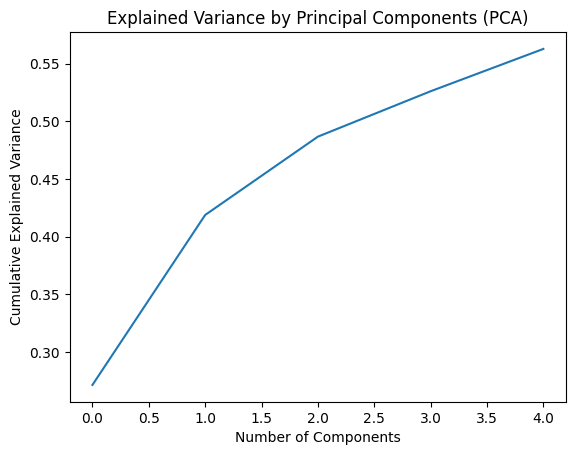

Original shape: (14034, 7500)
Reduced shape after PCA: (14034, 5)


In [14]:
# Perform PCA
pca = PCA(n_components=5)  # Keep 95% of variance
pca_result = pca.fit_transform(flattened_images)
 
# Explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
 
# Plot explained variance
plt.plot(explained_variance)
plt.title('Explained Variance by Principal Components (PCA)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()
 
print(f"Original shape: {flattened_images.shape}")
print(f"Reduced shape after PCA: {pca_result.shape}")

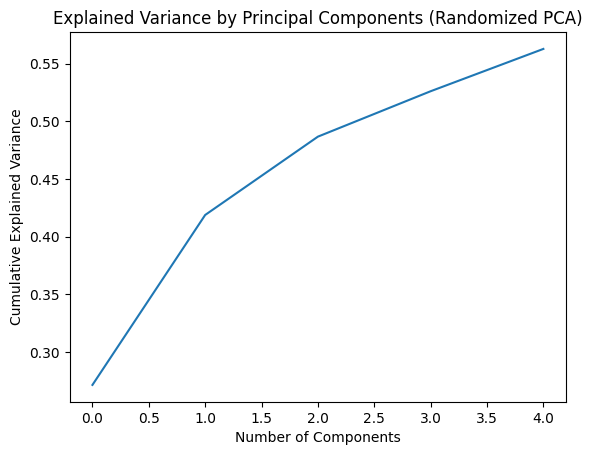

Original shape: (14034, 7500)
Reduced shape after Randomized PCA: (14034, 5)


In [15]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Determine the number of components to keep
n_components = 5  # Example: keep 50 components


# Perform Randomized PCA
randomized_pca = PCA(n_components=n_components, svd_solver='randomized')
pca_result = randomized_pca.fit_transform(flattened_images)

# Explained variance
explained_variance = np.cumsum(randomized_pca.explained_variance_ratio_)

# Plot explained variance
plt.plot(explained_variance)
plt.title('Explained Variance by Principal Components (Randomized PCA)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

print(f"Original shape: {flattened_images.shape}")
print(f"Reduced shape after Randomized PCA: {pca_result.shape}")

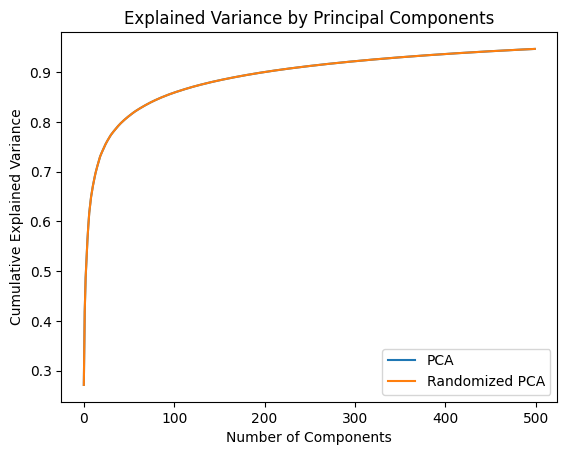

Original shape: (14034, 7500)
Reduced shape after PCA: (14034, 500)
Reduced shape after Randomized PCA: (14034, 500)


In [27]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Determine the number of components to keep
n_components = 500  # Example: keep 50 components

# Perform PCA
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(flattened_images)

# Perform Randomized PCA
randomized_pca = PCA(n_components=n_components, svd_solver='randomized')
randomized_pca_result = randomized_pca.fit_transform(flattened_images)

# Explained variance
explained_variance_pca = np.cumsum(pca.explained_variance_ratio_)
explained_variance_randomized_pca = np.cumsum(randomized_pca.explained_variance_ratio_)

# Plot explained variance
plt.plot(explained_variance_pca, label='PCA')
plt.plot(explained_variance_randomized_pca, label='Randomized PCA')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.show()

print(f"Original shape: {flattened_images.shape}")
print(f"Reduced shape after PCA: {pca_result.shape}")
print(f"Reduced shape after Randomized PCA: {randomized_pca_result.shape}")

Loading dataset...
Dataset contains 3000 samples with 4096 features each.
Number of classes: 6

Evaluating with n_components = 5
PCA reconstruction error: 0.0235, time taken: 17.9154s
Randomized PCA reconstruction error: 0.0235, time taken: 5.1786s

Evaluating with n_components = 10
PCA reconstruction error: 0.0186, time taken: 15.3830s
Randomized PCA reconstruction error: 0.0186, time taken: 5.8144s

Evaluating with n_components = 15
PCA reconstruction error: 0.0164, time taken: 16.5261s
Randomized PCA reconstruction error: 0.0164, time taken: 5.9924s

Evaluating with n_components = 25
PCA reconstruction error: 0.0139, time taken: 20.7536s
Randomized PCA reconstruction error: 0.0139, time taken: 7.9859s

Evaluating with n_components = 50
PCA reconstruction error: 0.0109, time taken: 22.9944s
Randomized PCA reconstruction error: 0.0109, time taken: 9.0846s

Evaluating with n_components = 75
PCA reconstruction error: 0.0094, time taken: 25.4607s
Randomized PCA reconstruction error: 0.00

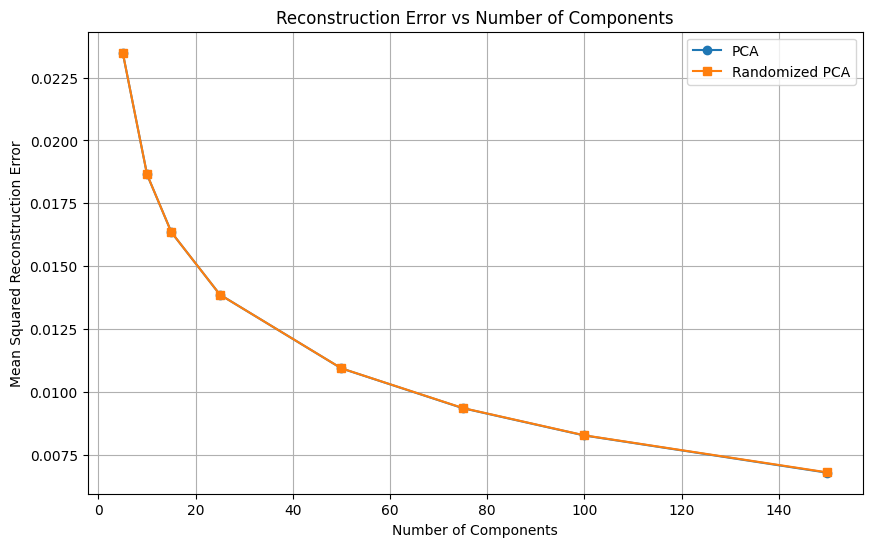

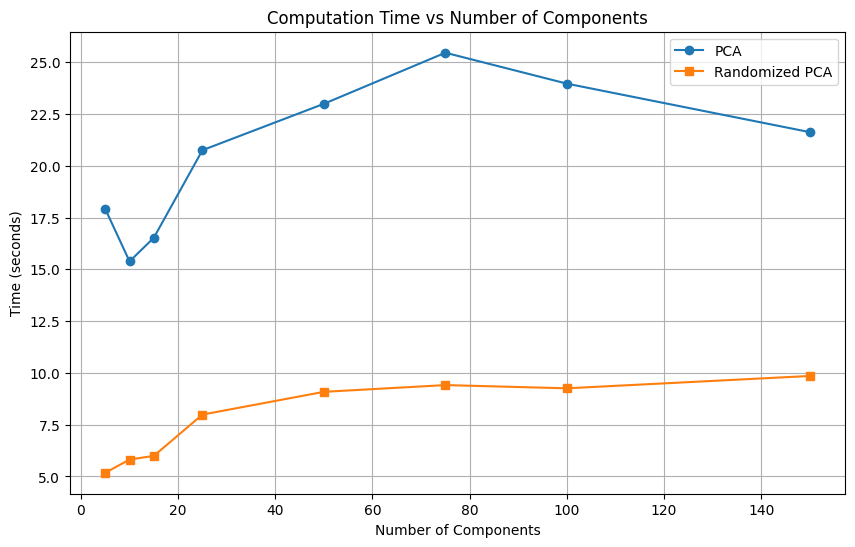

In [1]:
import numpy as np
import os
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time

# Define the path to the dataset
# Assume the dataset is organized as:
# dataset/
#   buildings/
#     image1.jpg
#     image2.jpg
#     ...
#   forest/
#     image1.jpg
#     ...
dataset_path = 'archive/seg_test/seg_test'

# Function to load images and flatten them
def load_images(dataset_path, img_size=(64, 64)):
    X = []
    y = []
    class_labels = os.listdir(dataset_path)
    for idx, label in enumerate(class_labels):
        class_folder = os.path.join(dataset_path, label)
        if not os.path.isdir(class_folder):
            continue
        for file in os.listdir(class_folder):
            if file.endswith(('.jpg', '.png', '.jpeg')):
                img_path = os.path.join(class_folder, file)
                try:
                    img = Image.open(img_path).convert('L')  # Convert to grayscale
                    img = img.resize(img_size)
                    img_array = np.array(img).flatten()
                    X.append(img_array)
                    y.append(idx)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    X = np.array(X)
    y = np.array(y)
    return X, y, class_labels

# Load the dataset
print("Loading dataset...")
X, y, class_labels = load_images(dataset_path)
n_samples, n_features = X.shape
print(f"Dataset contains {n_samples} samples with {n_features} features each.")
print(f"Number of classes: {len(class_labels)}")

# Normalize the data
X = X / 255.0  # Normalize pixel values to [0, 1]

# Define the range of principal components to test
n_components_list = [5, 10, 15, 25, 50, 75, 100, 150]

# Lists to store reconstruction errors and computation times
pca_reconstruction_error = []
rpca_reconstruction_error = []
pca_times = []
rpca_times = []

for n_components in n_components_list:
    print(f"\nEvaluating with n_components = {n_components}")
    
    # Standard PCA
    start_time = time.time()
    pca = PCA(n_components=n_components, svd_solver='full')
    X_pca = pca.fit_transform(X)
    X_pca_inverse = pca.inverse_transform(X_pca)
    end_time = time.time()
    pca_time = end_time - start_time
    pca_times.append(pca_time)
    pca_error = mean_squared_error(X, X_pca_inverse)
    pca_reconstruction_error.append(pca_error)
    print(f"PCA reconstruction error: {pca_error:.4f}, time taken: {pca_time:.4f}s")
    
    # Randomized PCA
    start_time = time.time()
    rpca = PCA(n_components=n_components, svd_solver='randomized', random_state=42)
    X_rpca = rpca.fit_transform(X)
    X_rpca_inverse = rpca.inverse_transform(X_rpca)
    end_time = time.time()
    rpca_time = end_time - start_time
    rpca_times.append(rpca_time)
    rpca_error = mean_squared_error(X, X_rpca_inverse)
    rpca_reconstruction_error.append(rpca_error)
    print(f"Randomized PCA reconstruction error: {rpca_error:.4f}, time taken: {rpca_time:.4f}s")

# Plot the reconstruction errors
plt.figure(figsize=(10, 6))
plt.plot(n_components_list, pca_reconstruction_error, marker='o', label='PCA')
plt.plot(n_components_list, rpca_reconstruction_error, marker='s', label='Randomized PCA')
plt.title('Reconstruction Error vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Reconstruction Error')
plt.legend()
plt.grid(True)
plt.show()

# Plot the computation times
plt.figure(figsize=(10, 6))
plt.plot(n_components_list, pca_times, marker='o', label='PCA')
plt.plot(n_components_list, rpca_times, marker='s', label='Randomized PCA')
plt.title('Computation Time vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

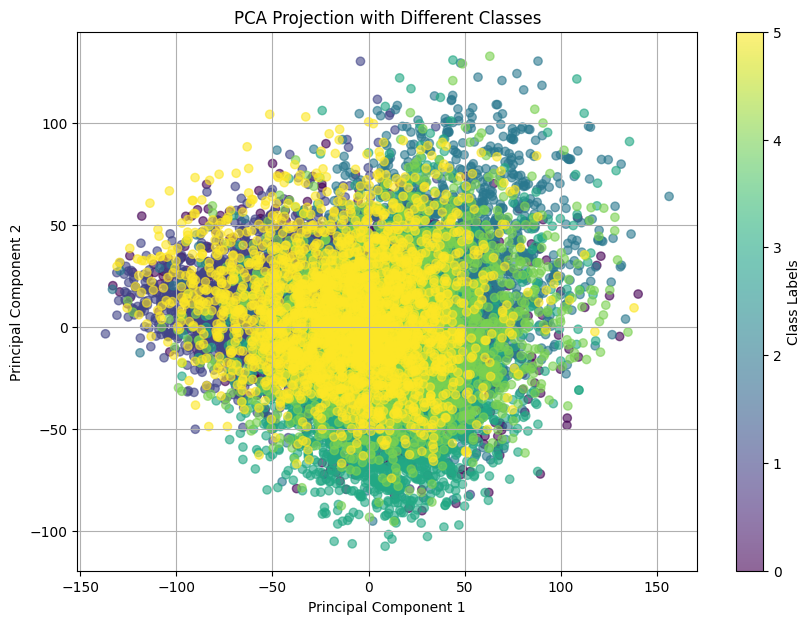

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
 
# Assuming X is your dataset (flattened images) and y_labels are the class labels
# Example dataset (replace with actual data)
X = flattened_images  
y_labels =  labels
 
# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
# Step 2: Perform PCA to reduce dimensions to 2 or 3 for visualization
pca = PCA(n_components=100)  # For 2D projection
X_pca = pca.fit_transform(X_scaled)
 
# Step 3: Create a scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label="Class Labels")
plt.title('PCA Projection with Different Classes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
from skimage.feature import daisy
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import cv2
import numpy as np
 
# Example of feature extraction using DAISY
def extract_daisy_features(image):
    if image is None:
        raise ValueError("Image not loaded correctly. Please check the file path.")
    
    # Check if the image is already in grayscale
    if len(image.shape) == 2:
        gray_image = image
    elif len(image.shape) == 3 and image.shape[2] == 3:
        gray_image = rgb2gray(image)
    else:
        raise ValueError("Unexpected image shape. Expected 2D grayscale or 3D RGB image.")
    
    daisy_features, daisy_image = daisy(gray_image, visualize=True)
    return daisy_features, daisy_image

# Assuming you have an image in the form of a NumPy array (150x150)
image = cv2.imread('archive\seg_train\seg_train\mountain\16.jpg')

# Convert BGR (OpenCV format) to RGB
if image is not None:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

daisy_features, daisy_visualization = extract_daisy_features(image)



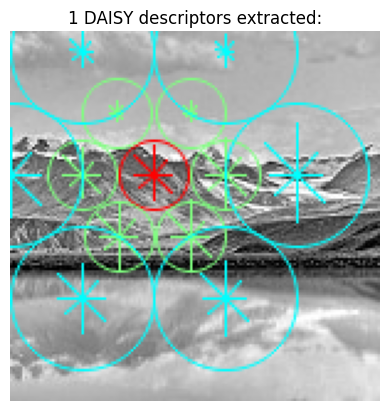

In [40]:
from skimage.feature import daisy
from skimage.color import rgb2gray
from skimage.io import imread
import matplotlib.pyplot as plt
 
# Load the image
image_path = r'archive\seg_train\seg_train\glacier\40.jpg'
img = imread(image_path)
 
# Convert the image to grayscale
gray_img = rgb2gray(img)
 
# Extract DAISY features
descs, descs_img = daisy(
    gray_img, step=180, radius=58, rings=2, histograms=6, orientations=8, visualize=True
)
 
# Plot the DAISY visualization
fig, ax = plt.subplots()
ax.axis("off")
ax.imshow(descs_img, cmap='gray')
descs_num = descs.shape[0] * descs.shape[1]
ax.set_title(f"{descs_num} DAISY descriptors extracted:")
plt.show()
 
 

### Citations
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.

https://www.jcchouinard.com/pca-explained-variance/